In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [137]:
data=pd.read_csv("study_data.csv")

In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [15]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
data["gender"].unique()

array(['female', 'male'], dtype=object)

Our main goal is to check whether any variable is directly effected the math score 
- our Y or Target variable is Math score 

<Axes: xlabel='math_score', ylabel='Count'>

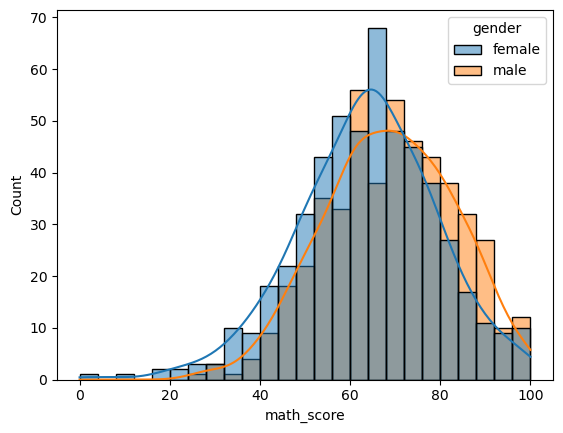

In [ ]:
sns.histplot(data=data,x='math_score',hue="gender",kde=True,)

- Most students, regardless of gender, score in the middle range (50-70).
- There are more females scoring closer to the peak value (around 60) compared to males, whose scores are slightly more varied.

Is there any effect of standard Lunch to the Score 

In [47]:
data["lunch"].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

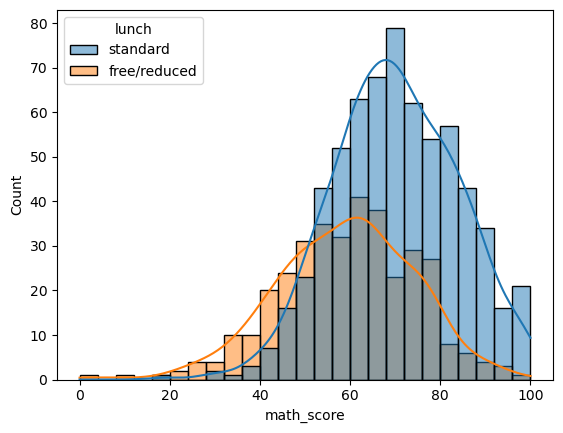

In [54]:
sns.histplot(data=data,x=data["math_score"],hue="lunch",kde=True)
plt.show()

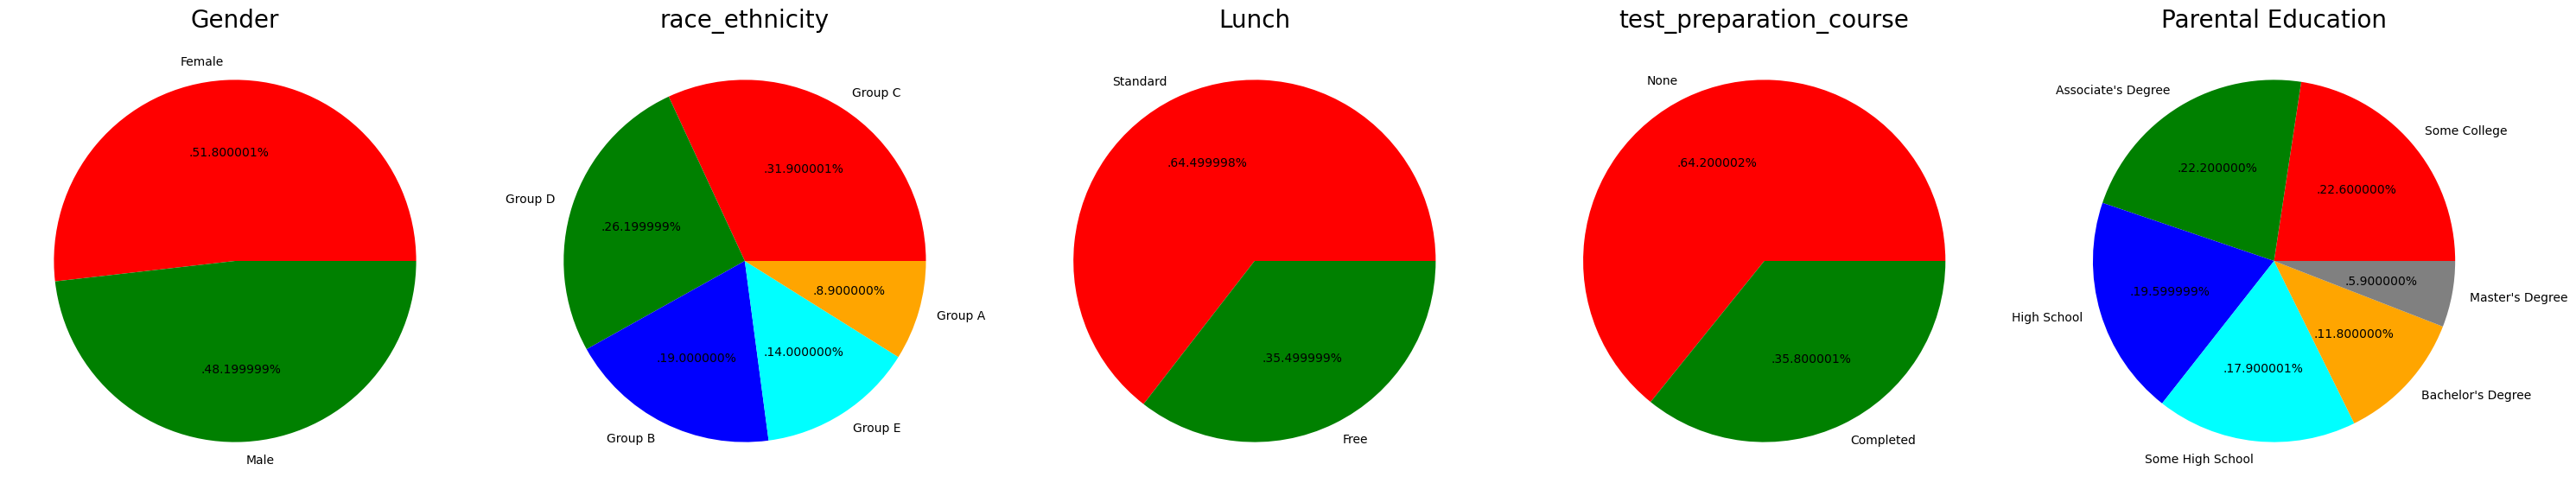

In [60]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

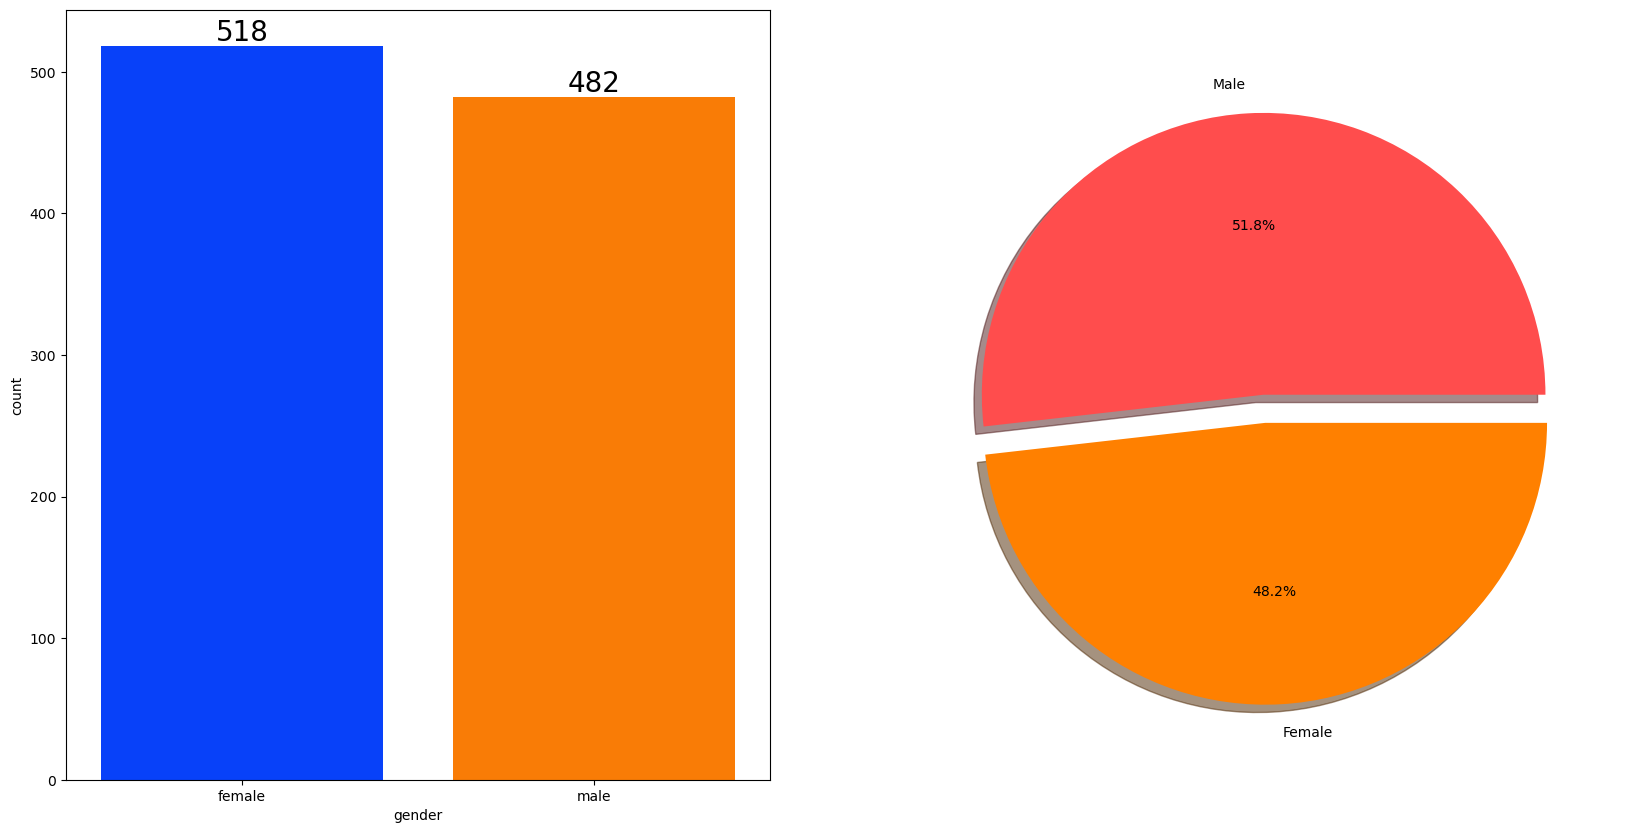

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [86]:
gender_group_math_score = data.groupby('gender')["math_score"].mean()
data["average_score"]=(data["reading_score"]+data["math_score"]+data["writing_score"])/3
gender_group_average_score=data.groupby('gender')["average_score"].mean()


In [88]:
gender_group_average_score[0]
import numpy as np

69.56949806949807

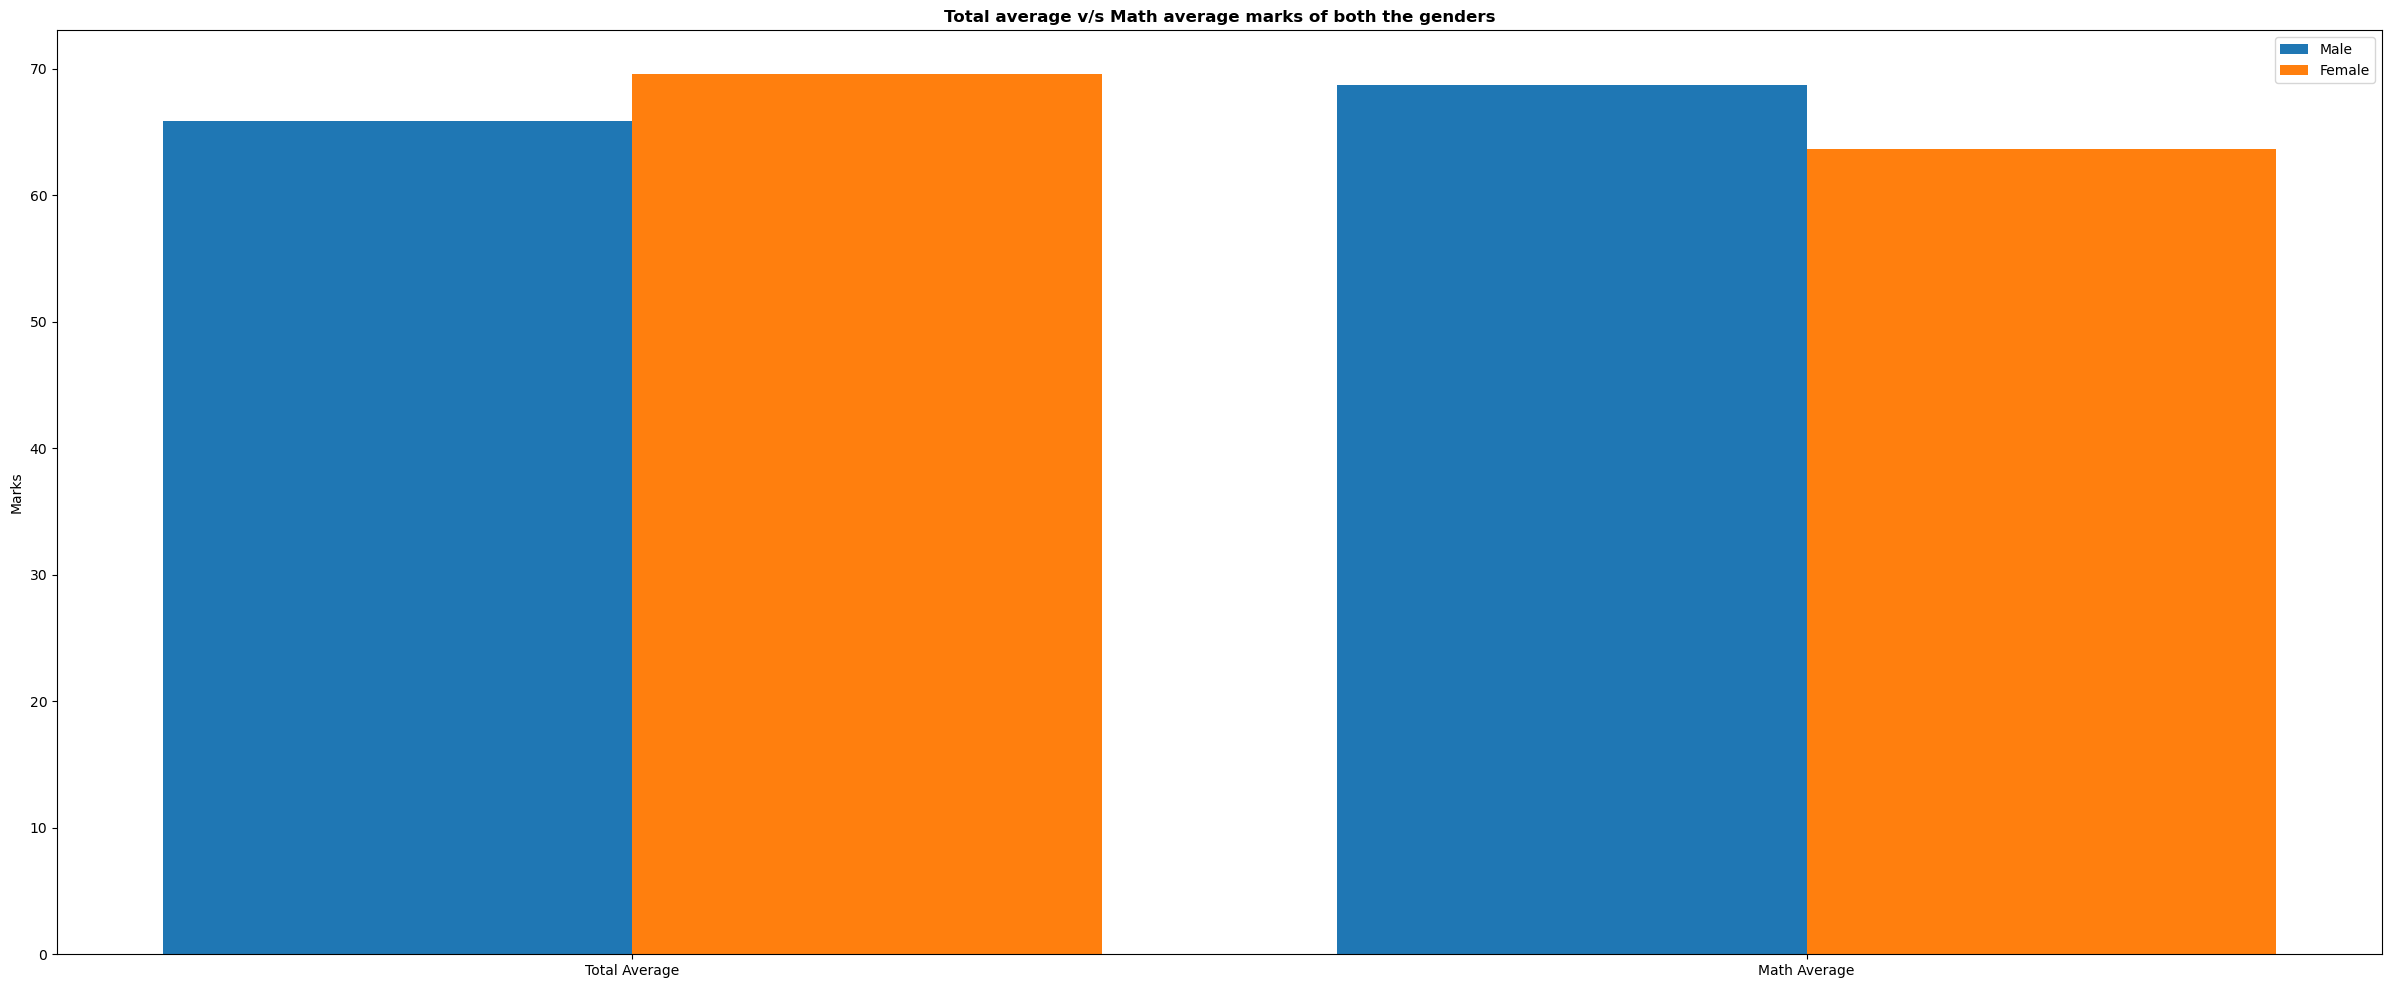

In [102]:




X = ['Total Average','Math Average']


female_scores = [gender_group_average_score[0], gender_group_math_score[0]]
male_scores = [gender_group_average_score[1], gender_group_math_score[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

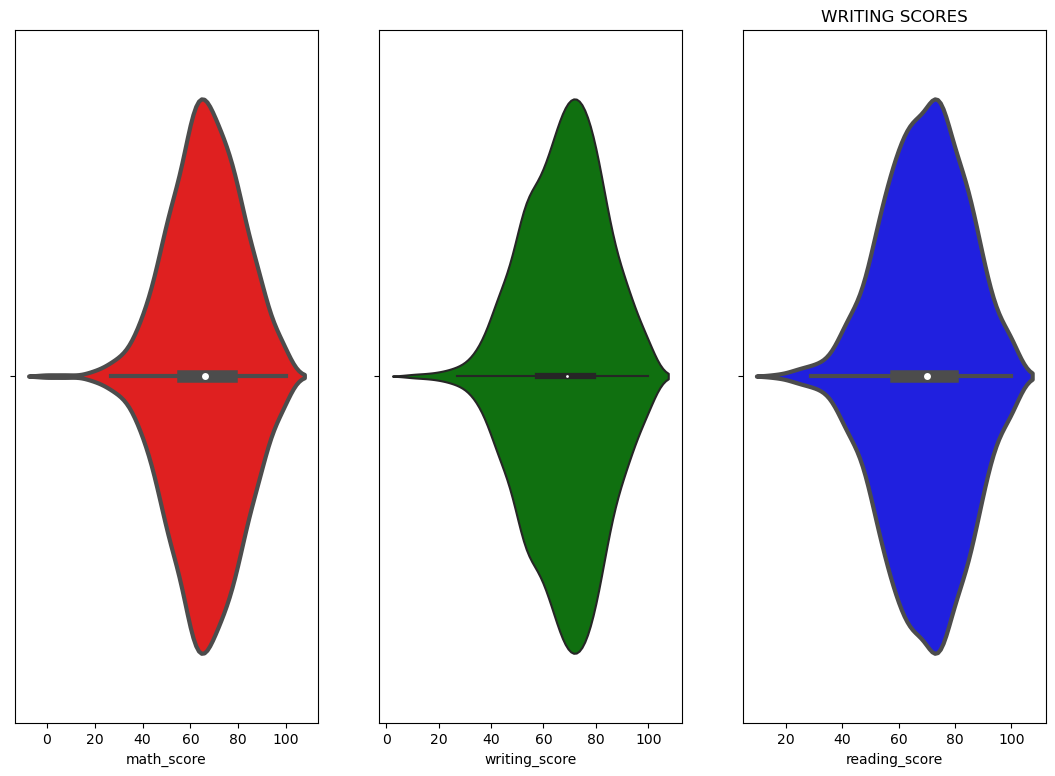

In [122]:
plt.figure(figsize=(18,9))
plt.subplot(1,4,1)
sns.violinplot(data=data,x="math_score",color='red',linewidth=3)
plt.subplot(1,4,2)
sns.violinplot(data=data,x="writing_score",color="green",linewidht=3,hue="gender")
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(x='reading_score',data=data,color='blue',linewidth=3)
plt.show()
plt.show()


In [164]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
oh_code=OneHotEncoder(sparse=False)


In [143]:
data["lunch"]=oh_code.fit(data["lunch"])

InvalidParameterError: The 'drop' parameter of OneHotEncoder must be a str among {'if_binary', 'first'}, an array-like or None. Got 'First' instead.

In [165]:
cat_features=data.select_dtypes(include="O")

In [166]:
cat_features

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [167]:
preprossor=oh_code.fit_transform(cat_features)

/Users/basitarif/Downloads/important_software/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [173]:
oh_code.get_feature_names_out(cat_features.columns)

array(['gender_female', 'gender_male', 'race_ethnicity_group A',
       'race_ethnicity_group B', 'race_ethnicity_group C',
       'race_ethnicity_group D', 'race_ethnicity_group E',
       "parental_level_of_education_associate's degree",
       "parental_level_of_education_bachelor's degree",
       'parental_level_of_education_high school',
       "parental_level_of_education_master's degree",
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school',
       'lunch_free/reduced', 'lunch_standard',
       'test_preparation_course_completed',
       'test_preparation_course_none'], dtype=object)

In [175]:
oh_code.get_feature_names_out()

array(['gender_female', 'gender_male', 'race_ethnicity_group A',
       'race_ethnicity_group B', 'race_ethnicity_group C',
       'race_ethnicity_group D', 'race_ethnicity_group E',
       "parental_level_of_education_associate's degree",
       "parental_level_of_education_bachelor's degree",
       'parental_level_of_education_high school',
       "parental_level_of_education_master's degree",
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school',
       'lunch_free/reduced', 'lunch_standard',
       'test_preparation_course_completed',
       'test_preparation_course_none'], dtype=object)